In [2]:
import numpy as np
import tensorflow as tf
import  pandas as pd

from modules.dataloader import DataLoader
from modules.embedding_extractor import EmbeddingExtractor

In [3]:
embedding_extractor = EmbeddingExtractor('resnet50')

In [4]:
data_loader = DataLoader("raw-img")
dataset = data_loader.load_data()

Found 3363 files belonging to 5 classes.


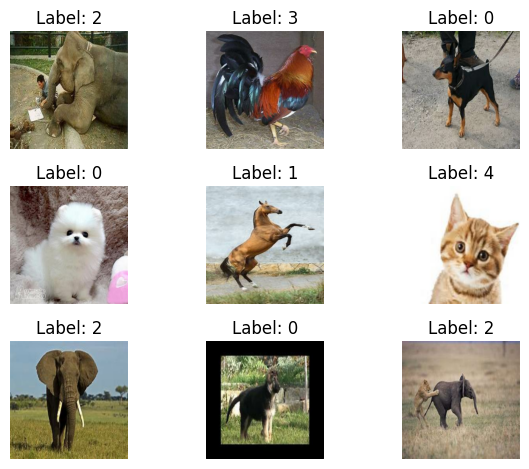

In [5]:
data_loader.plot_dataset()

In [5]:
embeddings_list = []
labels_list = []

num_batches = tf.data.experimental.cardinality(dataset).numpy()

embedding_extractor = EmbeddingExtractor('resnet50')

i = 1

for batch, labels in dataset:

    print(f"Processing batch {i}/{num_batches}...")
    
    batch_embeddings = embedding_extractor.extract_embeddings(batch)

    embeddings_list.append(batch_embeddings)
    labels_list.append(labels.numpy())  # converte os labels para numpy
    i += 1


Processing batch 1/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Processing batch 2/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 3/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 4/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 5/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 6/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 7/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 8/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 9/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 10/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 11/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 12/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 13/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 14/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 15/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 16/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
P

In [ ]:
embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)

df = pd.DataFrame(embeddings_array)
df['label'] = labels_array

df.to_csv('embeddings.csv', index=False)